In [2]:
import os
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras
from sklearn.metrics import f1_score
from keras.models import load_model
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
root_dir = "train"
numberofimg = {}
for dir in os.listdir(root_dir):
    numberofimg[dir] = len(os.listdir(os.path.join(root_dir, dir)))
print(numberofimg)
os.listdir("dataset")


{'no': 795, 'yes': 879}


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'dataset'

In [4]:
# CNN model

model = Sequential()
model.add(Conv2D(filters= 16, kernel_size=(3,3), activation= 'relu', input_shape = (224, 224,3)))

model.add(Conv2D(filters= 36, kernel_size=(3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Conv2D(filters= 64, kernel_size=(3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Conv2D(filters= 128, kernel_size=(3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Dropout(rate = 0.25))

model.add(Flatten())
model.add(Dense(units=64, activation= 'relu'))
model.add(Dropout(rate= 0.25))

model.add(Dense(units=1, activation= 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [5]:
model.compile(optimizer = 'adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [7]:
def preprocessingimages1(path):
    """
    input : path 
    output : Pre Precessing images
    """
    image_data = ImageDataGenerator(zoom_range = 0.2, shear_range = 0.2, 
                                   rescale= 1/225, horizontal_flip=True)
    image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size= 32, class_mode = 'binary')
    
    return image

In [8]:
def preprocessingimages2(path):
    """
    input : path 
    output : Pre Precessing images
    """
    image_data = ImageDataGenerator(rescale= 1/225)
    image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size= 32, class_mode = 'binary')
    
    return image

In [6]:
path= "validation"
val_data = preprocessingimages2(path)

Found 185 images belonging to 2 classes.


In [7]:
path= "train"
train_data = preprocessingimages1(path)

Found 1672 images belonging to 2 classes.


In [11]:
from keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint(monitor = "val_accuracy", filepath = "bestmodel.h5", verbose=1, save_best_only=True, mode='auto')


In [12]:
hs = model.fit_generator(generator= train_data,
                          epochs=30,  validation_data= val_data, callbacks=mc)

C:\Users\SHAMS UL AMIN\AppData\Local\Temp\ipykernel_6768\1440077760.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hs = model.fit_generator(generator= train_data,


Epoch 1/30
53/53 [==============================] - ETA: 0s - loss: 0.6375 - accuracy: 0.6507
Epoch 1: val_accuracy improved from -inf to 0.76216, saving model to bestmodel.h5
53/53 [==============================] - 284s 5s/step - loss: 0.6375 - accuracy: 0.6507 - val_loss: 0.5888 - val_accuracy: 0.7622
Epoch 2/30
53/53 [==============================] - ETA: 0s - loss: 0.5778 - accuracy: 0.7189  
Epoch 2: val_accuracy improved from 0.76216 to 0.77297, saving model to bestmodel.h5
53/53 [==============================] - 24150s 464s/step - loss: 0.5778 - accuracy: 0.7189 - val_loss: 0.4749 - val_accuracy: 0.7730
Epoch 3/30
53/53 [==============================] - ETA: 0s - loss: 0.5308 - accuracy: 0.7500
Epoch 3: val_accuracy improved from 0.77297 to 0.80000, saving model to bestmodel.h5
53/53 [==============================] - 274s 5s/step - loss: 0.5308 - accuracy: 0.7500 - val_loss: 0.4850 - val_accuracy: 0.8000
Epoch 4/30
53/53 [==============================] - ETA: 0s - loss: 0.

53/53 [==============================] - ETA: 0s - loss: 0.1730 - accuracy: 0.9366
Epoch 29: val_accuracy did not improve from 0.93514
53/53 [==============================] - 261s 5s/step - loss: 0.1730 - accuracy: 0.9366 - val_loss: 0.2428 - val_accuracy: 0.9081
Epoch 30/30
53/53 [==============================] - ETA: 0s - loss: 0.1413 - accuracy: 0.9426
Epoch 30: val_accuracy did not improve from 0.93514
53/53 [==============================] - 250s 5s/step - loss: 0.1413 - accuracy: 0.9426 - val_loss: 0.2344 - val_accuracy: 0.9297


In [14]:
h = hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [15]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

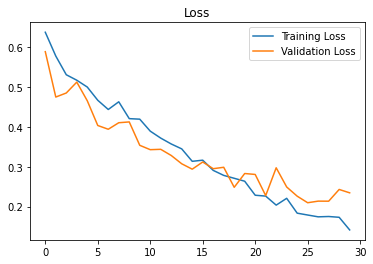

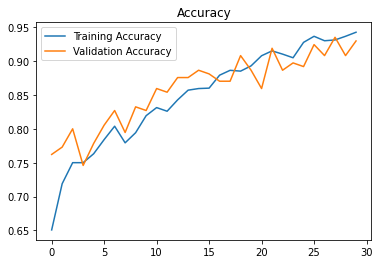

In [16]:
plot_metrics(h) 

In [3]:
best_model = load_model(filepath='bestmodel.h5')

In [3]:
best_model.metrics_names

['loss', 'accuracy']

In [15]:
X_test='test/no'
Y_test= 'test/yes'

In [6]:
loss, accuracy = best_model.evaluate(test_data)

NameError: name 'test_data' is not defined

Accuracy of the best model on the testing data:

In [23]:
print (f"Test Loss = {loss}")
print (f"Test Accuracy = {accuracy}")

Test Loss = 0.19319137930870056
Test Accuracy = 0.9417475461959839


In [9]:
path= "test"
test_data = preprocessingimages2(path)

Found 206 images belonging to 2 classes.


In [10]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

path ="ASD_119.jpg"

img = load_img(path, target_size = (224, 224))

input_arr = img_to_array(img)/225

input_arr.shape

input_arr = np.expand_dims(input_arr, axis=0)

pred = (best_model.predict(input_arr) > 0.5).astype("int32")

if (pred == 1):
    print("Brain Tumor is Detected")
else:
    print("Brain Tumor is not Detected")

FileNotFoundError: [Errno 2] No such file or directory: 'ASD_119.jpg'

In [12]:
preprocessingimages2(path)

Found 206 images belonging to 2 classes.


In [14]:
from sklearn.metrics import confusion_matrix
import itertools

# Plot the confusion matrix 
# if you wish to add normalization, set normalize = True

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Make predictions using the validation dataset
Y_pred = best_model.predict(x_val)
# Convert predictions to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix with range being equal to number of classes
plot_confusion_matrix(confusion_mtx, classes = range(5)) 

NameError: name 'x_val' is not defined